In [1]:
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
assert '1.21' in np.__version__ 

Populating the interactive namespace from numpy and matplotlib


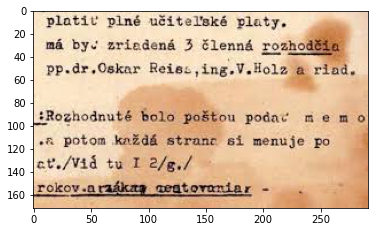

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('images/image4.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [4]:
from PIL import Image
img = Image.open('images/image4.jpeg').convert('L')
img.save('image4greyscale.png')

Populating the interactive namespace from numpy and matplotlib


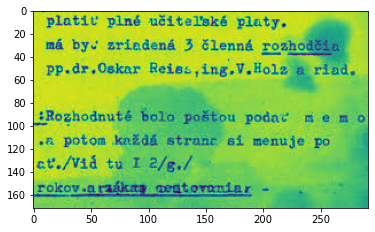

In [5]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('image4greyscale.png')
imgplot = plt.imshow(img)
plt.show()

In [6]:
img.shape

(172, 292)

In [7]:
img = np.floor(img * 256).astype(int)

In [8]:
def create_sliding_window(arr, shape=(3, 3)):
    r_extra = np.floor(shape[0] / 2).astype(int)
    c_extra = np.floor(shape[1] / 2).astype(int)
    out = np.empty((arr.shape[0] + 2 * r_extra, arr.shape[1] + 2 * c_extra))
    out[:] = np.nan
    out[r_extra:-r_extra, c_extra:-c_extra] = arr
    out = np.lib.stride_tricks.sliding_window_view(out, shape)
    return out

In [9]:
def binarize_textual_components(image, window_size=(5,5), k=0.2, R=128):
    
    # window size should always be odd
    assert window_size[0] % 2 == 1, "window size should always be odd"
    
    # create a view of a sliding window of shape (window_size, window_size) over every pixel of the image
    view = create_sliding_window(img, shape=window_size)
    
    # ignore nans while computing mean and std at local window level
    local_mean = np.nanmean(view, axis=(2, 3))
    local_std = np.nanstd(view, axis=(2, 3))
    
    pixel_threshold = local_mean * (1 + k * ((local_std/R) - 1))
    
    binarized_image = np.where(image >= pixel_threshold, 0, 255)
    return binarized_image

In [10]:
binarized_image = binarize_textual_components(img)

In [11]:
binarized_image.shape

(172, 292)

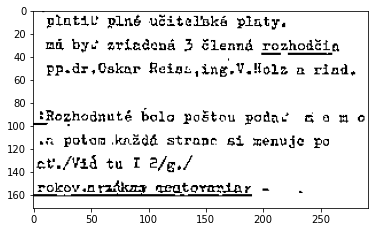

In [12]:
imgplot = plt.imshow(binarized_image, cmap='Greys')
plt.show()

In [13]:
binarized_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])